In [1]:
import matplotlib.pyplot as plt
import pandas as pd

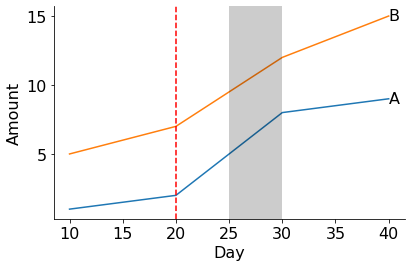

In [2]:
plt.rcParams["font.size"] = 16
df = pd.DataFrame({"A": [1,2,8,9], "B": [5,7,12,15]}, index=[10,20,30,40])
ax = df.plot.line(legend=False)
ax.set_xlabel("Day")
ax.set_ylabel("Amount")

# 1. labels at end of lines
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
for col in df.columns:
    a = ax.text(df.index[-1], df[col].iat[-1], col, va="center", ha="left")

# 2. vertical line
ylim = ax.get_ylim()
patch = plt.Line2D((20,20), ylim, color="r", linestyle="--")
ax.add_artist(patch)

# 3. highlighted region
patch = plt.Rectangle((25,ylim[0]), 5, ylim[1]-ylim[0],
                      edgecolor="none",
                      facecolor="k", zorder=10, alpha=0.2)
ax.add_artist(patch)

plt.tight_layout()

In [3]:
df.columns

Index(['A', 'B'], dtype='object')

# GeoPandas

In [4]:
import pandas as pd
import geopandas as gpd

In [5]:
# .geojson, .shp => shapefile
path = gpd.datasets.get_path("naturalearth_lowres")
path

'/home/trh/.local/lib/python3.8/site-packages/geopandas/datasets/naturalearth_lowres/naturalearth_lowres.shp'

In [6]:
!ls /home/trh/.local/lib/python3.8/site-packages/geopandas/datasets/naturalearth_lowres/

naturalearth_lowres.cpg  naturalearth_lowres.prj  naturalearth_lowres.shx
naturalearth_lowres.dbf  naturalearth_lowres.shp


In [7]:
!ls /home/trh/.local/lib/python3.8/site-packages/geopandas/datasets

__init__.py  naturalearth_cities       naturalearth_lowres
__pycache__  naturalearth_creation.py  nybb_16a.zip


In [8]:
df = gpd.read_file(path).set_index("name")
df

,pop_est,continent,iso_a3,gdp_md_est,geometry
name,,,,,
Fiji,920938,Oceania,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
Tanzania,53950935,Africa,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
W. Sahara,603253,Africa,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
Canada,35623680,North America,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
United States of America,326625791,North America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...
Serbia,7111024,Europe,SRB,101800.0,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
Montenegro,642550,Europe,MNE,10610.0,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
Kosovo,1895250,Europe,-99,18490.0,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."


In [9]:
type(df)

geopandas.geodataframe.GeoDataFrame

In [10]:
type(df).__mro__

(geopandas.geodataframe.GeoDataFrame,
 geopandas.base.GeoPandasBase,
 pandas.core.frame.DataFrame,
 pandas.core.generic.NDFrame,
 pandas.core.base.PandasObject,
 pandas.core.accessor.DirNamesMixin,
 pandas.core.indexing.IndexingMixin,
 pandas.core.arraylike.OpsMixin,
 object)

In [11]:
type(df["geometry"]).__mro__

(geopandas.geoseries.GeoSeries,
 geopandas.base.GeoPandasBase,
 pandas.core.series.Series,
 pandas.core.base.IndexOpsMixin,
 pandas.core.arraylike.OpsMixin,
 pandas.core.generic.NDFrame,
 pandas.core.base.PandasObject,
 pandas.core.accessor.DirNamesMixin,
 pandas.core.indexing.IndexingMixin,
 object)

In [12]:
df["geometry"]

name
Fiji                        MULTIPOLYGON (((180.00000 -16.06713, 180.00000...
Tanzania                    POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...
W. Sahara                   POLYGON ((-8.66559 27.65643, -8.66512 27.58948...
Canada                      MULTIPOLYGON (((-122.84000 49.00000, -122.9742...
United States of America    MULTIPOLYGON (((-122.84000 49.00000, -120.0000...
                                                  ...                        
Serbia                      POLYGON ((18.82982 45.90887, 18.82984 45.90888...
Montenegro                  POLYGON ((20.07070 42.58863, 19.80161 42.50009...
Kosovo                      POLYGON ((20.59025 41.85541, 20.52295 42.21787...
Trinidad and Tobago         POLYGON ((-61.68000 10.76000, -61.10500 10.890...
S. Sudan                    POLYGON ((30.83385 3.50917, 29.95350 4.17370, ...
Name: geometry, Length: 177, dtype: geometry

In [13]:
df.head()

,pop_est,continent,iso_a3,gdp_md_est,geometry
name,,,,,
Fiji,920938,Oceania,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
Tanzania,53950935,Africa,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
W. Sahara,603253,Africa,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
Canada,35623680,North America,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
United States of America,326625791,North America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


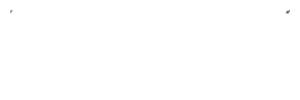

In [14]:
df.iat[0, -1]

<class 'shapely.geometry.polygon.Polygon'>


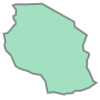

In [18]:
print(type(df.iat[1, -1]))
df.iat[1, -1]

<class 'shapely.geometry.multipolygon.MultiPolygon'>


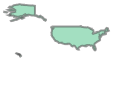

In [19]:
print(type(df.at["United States of America", "geometry"]))
df.at["United States of America", "geometry"]

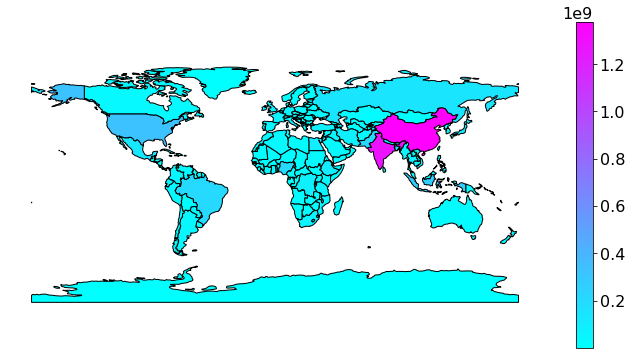

In [33]:
ax = df.plot(figsize=(12,6), edgecolor="k", column="pop_est", legend=True, cmap="cool")
ax.set_axis_off()

In [40]:
# want every country with >100 million to be red
df["color"] = "0.7"
df.loc[df["pop_est"] >= 1e8, "color"] = "red"
df

,pop_est,continent,iso_a3,gdp_md_est,geometry,color
name,,,,,,
Fiji,920938,Oceania,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",0.7
Tanzania,53950935,Africa,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",0.7
W. Sahara,603253,Africa,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",0.7
Canada,35623680,North America,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",0.7
United States of America,326625791,North America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",red
...,...,...,...,...,...,...
Serbia,7111024,Europe,SRB,101800.0,"POLYGON ((18.82982 45.90887, 18.82984 45.90888...",0.7
Montenegro,642550,Europe,MNE,10610.0,"POLYGON ((20.07070 42.58863, 19.80161 42.50009...",0.7
Kosovo,1895250,Europe,-99,18490.0,"POLYGON ((20.59025 41.85541, 20.52295 42.21787...",0.7


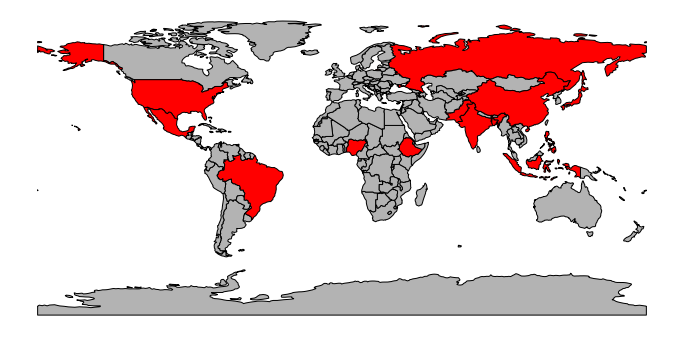

In [41]:
ax = df.plot(figsize=(12,6), edgecolor="k", color=df["color"])
ax.set_axis_off()

In [28]:
df

,pop_est,continent,iso_a3,gdp_md_est,geometry
name,,,,,
Fiji,920938,Oceania,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
Tanzania,53950935,Africa,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
W. Sahara,603253,Africa,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
Canada,35623680,North America,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
United States of America,326625791,North America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...
Serbia,7111024,Europe,SRB,101800.0,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
Montenegro,642550,Europe,MNE,10610.0,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
Kosovo,1895250,Europe,-99,18490.0,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."


# Shapely

In [42]:
from shapely.geometry import Polygon, box, Point

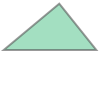

In [43]:
p1 = Polygon([(0,0), (1.2,1), (2,0)])
p1

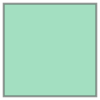

In [47]:
p2 = box(0, 0, 1, 1)
p2

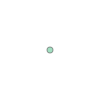

In [48]:
p3 = Point(5, 5)
p3

<class 'shapely.geometry.polygon.Polygon'>


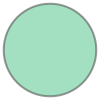

In [50]:
p4 = p3.buffer(1)
print(type(p4))
p4

In [ ]:
# shape operations are like set operations

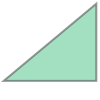

In [51]:
p1.intersection(p2) # like AND

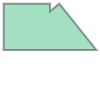

In [53]:
p1.union(p2) # like OR

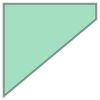

In [55]:
p2.difference(p1) # like SUBTRACT

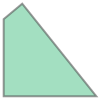

In [56]:
p1.difference(p2) # like SUBTRACT

In [58]:
p1.intersects(p2)

True

False


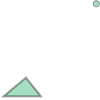

In [60]:
print(p1.intersects(p3))
p1.union(p3)

True


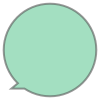

In [64]:
# is my point (p3) nearby (<6 units) of my triangle (p1)
nearby_p3 = p3.buffer(6)
print(p1.intersects(nearby_p3))
p1.union(nearby_p3)

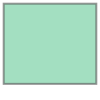

In [74]:
# x,y will longtitude and latitude
eur_window = box(-10.67, 34.5, 31.55, 71.05)
eur_window

<AxesSubplot:>

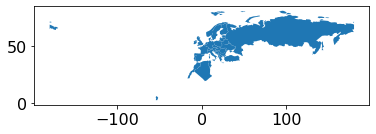

In [75]:
df[df.intersects(eur_window)].plot()

<AxesSubplot:>

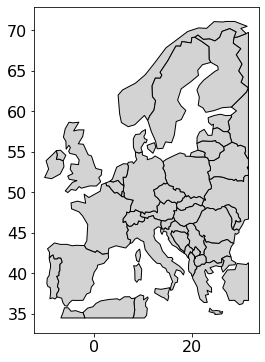

In [85]:
eur = df.intersection(eur_window)
eur[~eur.is_empty]
eur.plot(color="lightgray", edgecolor="k", figsize=(12,6)) # color can be buggy with geopandas when plotting empty shapes

# Correctly Compute and See Centroids

/tmp/ipykernel_289376/34918218.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  eur.centroid


name
Fiji                                      POINT EMPTY
Tanzania                                  POINT EMPTY
W. Sahara                                 POINT EMPTY
Canada                                    POINT EMPTY
United States of America                  POINT EMPTY
                                      ...            
Serbia                      POINT (20.81965 44.23304)
Montenegro                  POINT (19.28618 42.78904)
Kosovo                      POINT (20.89536 42.57937)
Trinidad and Tobago                       POINT EMPTY
S. Sudan                                  POINT EMPTY
Length: 177, dtype: geometry

/tmp/ipykernel_289376/158561656.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  eur.centroid.plot(ax=ax)


<AxesSubplot:>

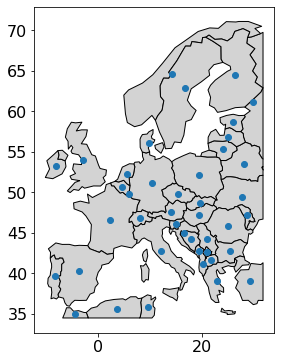

In [88]:
ax = eur.plot(color="lightgray", edgecolor="k", figsize=(12,6))
eur.centroid.plot(ax=ax)

In [89]:
eur.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [90]:
eur2 = eur.to_crs("EPSG:3035")
eur2.crs

<Derived Projected CRS: EPSG:3035>
Name: ETRS89-extended / LAEA Europe
Axis Info [cartesian]:
- Y[north]: Northing (metre)
- X[east]: Easting (metre)
Area of Use:
- name: Europe - European Union (EU) countries and candidates. Europe - onshore and offshore: Albania; Andorra; Austria; Belgium; Bosnia and Herzegovina; Bulgaria; Croatia; Cyprus; Czechia; Denmark; Estonia; Faroe Islands; Finland; France; Germany; Gibraltar; Greece; Hungary; Iceland; Ireland; Italy; Kosovo; Latvia; Liechtenstein; Lithuania; Luxembourg; Malta; Monaco; Montenegro; Netherlands; North Macedonia; Norway including Svalbard and Jan Mayen; Poland; Portugal including Madeira and Azores; Romania; San Marino; Serbia; Slovakia; Slovenia; Spain including Canary Islands; Sweden; Switzerland; Turkey; United Kingdom (UK) including Channel Islands and Isle of Man; Vatican City State.
- bounds: (-35.58, 24.6, 44.83, 84.73)
Coordinate Operation:
- name: Europe Equal Area 2001
- method: Lambert Azimuthal Equal Area
Datum: Europ

<AxesSubplot:>

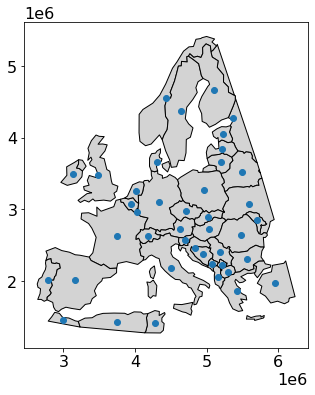

In [92]:
ax = eur2.plot(color="lightgray", edgecolor="k", figsize=(12,6))
eur2.centroid.plot(ax=ax)